# Training neural networks

### 1: Data loading 
Import the packages and load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

data = loadmat("data.mat")            
X = data["X"]
y = data ["y"] 
del data
m = X.shape[0]
print('Shape of X and y in order:')
print(X.shape)
print(y.shape)

data = loadmat("weights.mat")  
w1 = np.array(data["Theta1"])
w2 = np.array(data["Theta2"])     
print('Shape of w1 and w2 in order:')
print(w1.shape)
print(w2.shape)
del data

Shape of X and y in order:
(5000, 400)
(5000, 1)
Shape of w1 and w2 in order:
(25, 401)
(10, 26)


### 2: Data visualization

Printing some random data ...


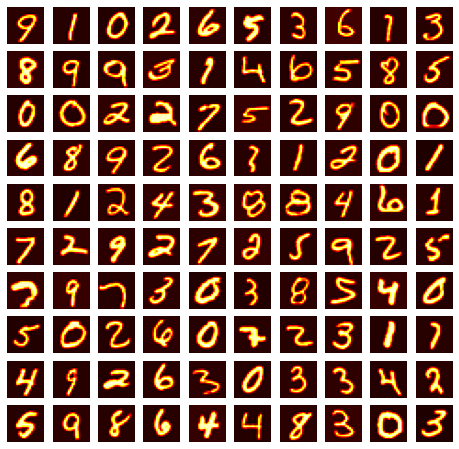

In [2]:
print("Printing some random data ...")                              
fig, ax = plt.subplots(10,10, figsize =(8,8))                  # subplots - 10x10 8x8 image size
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(X[np.random.randint(0,m+1),:].reshape(20,20, order = "F"), cmap="hot")
        ax[i,j].axis("off")
plt.show()

### 3. Theoretical overview

For easier understanding, consider the following simple example.

<img src="network.png">

The outlined neural network consists of 3 layers:
- Input layer, which contains 2 input neurons plus the added BIAS.
- Hidden layer, which contains 3 neurons plus BIAS.
- Output layer, which contains 3 neurons, of which the maximum is selected to get the actual output.


Let use the following notations: <br>
$a^{(j)}_{i}$ - the activation of neuron i in layer j <br>
$s^{(j)}_{i}$ - the weighted sum of neuron i in layer j <br>
$w^{(j)}_{lk}$ - the weight between neuron i in layer j and neuron k in layer j+1 <br>
$x^{(m)}_{n}$ - parameter n of the m input sample. ($x^{(1)}_0 = 1)$ is the BIAS<br> 
$\hat y$ - the prediction

First the foward process: <br>
- Attach the BIOS value to $x^{(1)}$
- Calculate the weighted sum  $ \underset{1\times 3}{\mathrm{x^{(1)}}} \times \underset{3\times 3}{\mathrm{w^{(1)}}} = \underset{1\times 3}{\mathrm{s^{(2)}}} $
- calculate the activations $ \underset{\color{red}{1\times 3}}{\mathrm{a^{(2)}}} = f(\underset{1\times 3}{\mathrm{s^{(2)}}}) = sigmoid(\underset{1\times 3}{\mathrm{s^{(2)}}}) $ 
- Attach the BIOS value to the hiden layer $ \underset{\color{red}{1\times 4}}{\mathrm{a^{(2)}}} \times \underset{4\times 3}{\mathrm{w^{(2)}}} = \underset{1\times 3}{\mathrm{s^{(3)}}}  $
- calculate the activations for the output $ \underset{1\times 3}{\mathrm{a^{(3)}}} = f(\underset{1\times 3}{\mathrm{s^{(3)}}}) = sigmoid(\underset{1\times 3}{\mathrm{s^{(3)}}}) $
- prediction $ \underset{1\times 3}{\mathrm{\hat{y}}} = \underset{1\times 3}{\mathrm{a^{(3)}}} $
- choose the maximum value with $ argmax() $

#### Cost function

We use the Mean Square Error (MSE) method as a cost function. Let's look at the error backpropagation process starting from the output neuron. 
<br>

$ C = \sum\{\frac{1}{2}(y-\color{red}{\hat y})^2 \} $

$ C = \sum\{\frac{1}{2}(y-{\color{red}{a^{(3)}}})^2 \} $

$ C = \sum\{\frac{1}{2}(y-f({\color{red}{s^{(3)}}}))^2\} $

$ C = \sum\{\frac{1}{2}(y-f({\color{red}{a^{(2)}}}w^{(2)}))^2\} $

$ C = \sum\{\frac{1}{2}(y-f(f({\color{red}{s^{(2)}}})w^{(2)}))^2\}$

$ C = \sum\{\frac{1}{2}(y-f(f(xw^{(1)})w^{(2)}))^2\} $

The error calculation can therefore be traced back to the function of the input variables and the weights in the network. The formula can be applied to any number of layers.

#### Training (Back Propagation)
During error backpropagation, starting from the output layer, we calculate backwards how much each neuron contributes to the error. In practice, the steps used in the calculation of the cost function must be completed in half, which means that we will need the derivative of the activation function. <br>

##### Sigmoid function and its derivative


$g(z) = \frac{1}{1+e^{-z}}$ 

\begin{split}
g'(z) = 
& = \frac{d}{dz}\frac{1}{1+e^{-z}} \\
& = \frac{1}{(1+e^{-z})^2}(e^{(-z)}) \\
& = \frac{1}{1+e^{-z}}(1-\frac{1}{(1+e^{-z})}) \\
& = g(z)(1-g(z))
\end{split}

<img src="sigmoidderiv.png" width=400>

The error can be backpropagated, by partially deriving the cost function according to the elements of the corresponding weight matrix, we get the decreasing error direction in the neurons of the hidden layer.

$ \begin{split}
\frac{\partial C}{\partial w^{(2)}} = \frac{\partial \sum \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}} = \sum (\frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}}) 
\end{split}$

For easier understanding, we define the derivation for one element. <br>

$
\begin{split}
\frac{\partial \frac{1}{2}(y-\hat{y})^2}{\partial w^{(2)}} 
& = (y-\hat{y})(-\frac{\hat{y}}{\partial w^{(2)}}) \\
& = -(y-\hat{y}) \cdot \frac{\partial \hat{y}}{\partial s^{(3)}}\cdot \frac{\partial 	s^{(3)}}{\partial w^{(2)}}\\	
& = \color{red}{-(y-\hat{y}) \cdot f'(s^{(3)})}\cdot
\frac{\partial a^{(2)}w^{(2)}}{\partial w^{(2)}}\\
& = {\color{red} {\delta^{(3)}}\cdot a^{(2)}}
\end{split}
$<br>

Let $ \delta^{(j)}_{i} $ be the error component for neuron i in layer j. <br>
In matrix form, we get the following formula: <br>
$ (a^{(2)})^T \delta^{(3)} $


#### Training
During the training phase, the weights are changed using the Gradient Descent method, as previously learned. For the weight modification, we need to define a learning rate $(\mu)$ and we can optionally specify the penalty term. <br>

$ w^{(1)} = w^{(1)} - \mu \frac{\partial C}{w^{(1)}}+ regularization $

$ w^{(2)} = w^{(2)} - \mu \frac{\partial C}{w^{(2)}}+ regularization $

#### Steps of the process 

1, $\hspace{2mm} xw^{(1)} = s^{(2)} $

2, $\hspace{14mm} f(s^{(2)}) = a^{(2)}$ 

3, $\hspace{32mm} a^{(2)} w^{(2)} = s^{(3)} $

4, $\hspace{48mm} f(s^{(3)}) = \hat{y} $

5, $\hspace{2mm} C = \sum\{\frac{1}{2}(y-\hat y)^2 \} $

6, $\hspace{2mm} -(y-\hat{y}) \cdot f'(s^{(3)}) = \delta^{(3)} $

7, $\hspace{28mm} (a^{(2)})^T \delta^{(3)} =  \frac{\partial C}{\partial w^{(2)}} $

8, $\hspace{39mm} \delta ^{(3)} \cdot (w^{(2)})^T \cdot f'(s^{(2)})= \delta ^{(2)} $

9, $\hspace{78mm} x^T \delta^{(2)} =  \frac{\partial C}{\partial w^{(1)}} $

10, $\hspace{2mm} w^{(1)} = w^{(1)} - \mu \frac{\partial C}{w^{(1)}}+ regularization $

$\hspace{8mm}w^{(2)} = w^{(2)} - \mu \frac{\partial C}{w^{(2)}}+ regularization $

### 3: Parameter initialisation

In [3]:
Lambda = 1                                              # Penalty
input_layer_size = 400                                  # Input size
hidden_layer_size = 25                                  # Hidden layer size
num_labels = 10                                         # Output size
nn_params = np.append(w1.flatten(), w2.flatten())       # append the weights to create 1 NN parameter

The tracking of the architecture is more transparent if the neuron numbers of each layer are stored without the BIAS members. The dimensions of the matrices can be reset based on the neuron numbers of each layer. Furthermore, we will need the learning rate as a preset parameter.

### 4: Cost function
Activation function and its derivative:

In [4]:
def sigmoid(z): 
    g = 1/(1+(np.exp(-z))) 
    return g

def sigmoidGradient(z):   
    g_deriv = sigmoid(z) * (1-sigmoid(z))   
    return g_deriv

##### One Hot Encoding

To match the output of the neural network, we will need a little more transformation. We gave the labels of the samples with a number, but we are working on a 10-group classification problem. Accordingly, we will have 10 output neurons, which will indicate the probability that the given sample belongs to a given class. We will therefore define the predicted class on the basis of the highest probability. For this conversion, we will use the One Hot Encoding method (only one 1). The essence of the method is to convert each label into a vector whose number of elements is the same as the number of classes and contains only one 1 in the column of the corresponding class.

Our original labels are the numbers 0-9 (left side), the vectors of our corresponding converted labels (right side). Note that the transformed label vectors look very similar to a unit matrix when arranged.

<img src="onehot.png" width=300>

In [5]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    # nn_params factoring w1 and w2 into matrices
    w1 = nn_params[:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    w2 = nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)

    m = X.shape[0]
    C = 0
    w1_grad = np.zeros((w1.shape))
    w2_grad = np.zeros((w2.shape))

    A1_B = np.hstack((np.ones((m, 1)), X))                # input and BIAS
    S2   = A1_B @ w1.T                                    # hiden layer
    A2   = sigmoid(S2)
    A2_B = np.hstack((np.ones((A2.shape[0], 1)), A2))     
    S3   = A2_B @ w2.T                                    # output
    A3   = sigmoid(S3)
    
    y_hat = A3
    Y = np.zeros((m, num_labels))
    I = np.eye(num_labels)

    for i in range(1, m+1):
        Y[i-1, :] = I[y[i-1]-1, :]

    penalty  = (Lambda / (2 * m)) *   ((np.sum(w1[:, 1:] ** 2)) + np.sum(w2[:,1:]**2)) 
    
    # Cost Function
    C = (1/m) * (np.sum((-Y)*np.log(y_hat)-((1-Y)*np.log(1-y_hat)))) + penalty

    # Back Propagation
    sigma3 = y_hat - Y
    sigma3 = sigma3 * sigmoidGradient(S3)
    sigma2 = (sigma3 @ w2) * sigmoidGradient(np.hstack((np.ones([S2.shape[0],1]), S2)))    
    sigma2 = sigma2[:, 1:]
    
    delta_1 = (sigma2.T @ A1_B)
    delta_2 = (sigma3.T @ A2_B)
    
    p1 = (Lambda/m) * np.hstack((np.zeros((w1.shape[0], 1)), w1[:, 1:]))
    p2 = (Lambda/m) * np.hstack((np.zeros((w2.shape[0], 1)), w2[:, 1:]))

    w1_grad = delta_1 / m + p1
    w2_grad = delta_2 / m + p2
    grad = np.append(w1_grad.flatten(), w2_grad.flatten())

    return C, grad

In [6]:
Lambda = 0    
C, grad = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print("Cost at debugging parameters: %.6f \nFor Lambda = 0 it should be:  0.287629" % C)
Lambda = 3    
C, grad = nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
print("Cost at debugging parameters: %.6f \nFor Lambda = 3 it should be:  0.576051" % C)

Cost at debugging parameters: 0.287629 
For Lambda = 0 it should be:  0.287629
Cost at debugging parameters: 0.576051 
For Lambda = 3 it should be:  0.576051


### 5: Initial weights

The initial weights are initialized with a uniform distribution over a specified interval. The weights do not start from an initial value of 0, which allows for convergence. 

In [7]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out,L_in+1)*(2*epsilon_init)-epsilon_init
    return W

In [8]:
initial_w1 = randInitializeWeights(input_layer_size,hidden_layer_size)
initial_w2 = randInitializeWeights(hidden_layer_size,num_labels)
initial_nn_params = np.append(initial_w1.flatten(),initial_w2.flatten())

### 6: Gradient descent

To train the network, we implement the gradient descent method.

In [9]:
def gradientDescentnn(X, y, initial_nn_params, lr_rate, num_iters, Lambda, input_layer_size, hidden_layer_size,
                      num_labels):

    w1 = initial_nn_params[:((input_layer_size + 1) * hidden_layer_size)].reshape(hidden_layer_size, input_layer_size + 1)
    w2 = initial_nn_params[((input_layer_size + 1) * hidden_layer_size):].reshape(num_labels, hidden_layer_size + 1)

    m = len(y)
    C_history = []

    for i in range(num_iters):
        if (i%20==0):
            print('Iteration:', i+1)
        elif (i==num_iters-1):
            print('Done!')
        
        nn_params = np.append(w1.flatten(), w2.flatten())
        C, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
        
        w1_grad = grad[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
        w2_grad = grad[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
        
        w1 = w1 - (lr_rate * w1_grad)
        w2 = w2 - (lr_rate * w2_grad)
        C_history.append(C)

    nn_paramsFinal = np.append(w1.flatten(), w2.flatten())
    return nn_paramsFinal, C_history

In [10]:
# Setting training parameters
lr_rate = 0.9
num_iter = 400
Lambda = 0.1

nnw, nnC_history = gradientDescentnn(X,y,initial_nn_params,lr_rate,num_iter,Lambda,input_layer_size,hidden_layer_size,num_labels)
w1 = nnw[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
w2 = nnw[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

Iteration: 1
Iteration: 21
Iteration: 41
Iteration: 61
Iteration: 81
Iteration: 101
Iteration: 121
Iteration: 141
Iteration: 161
Iteration: 181
Iteration: 201
Iteration: 221
Iteration: 241
Iteration: 261
Iteration: 281
Iteration: 301
Iteration: 321
Iteration: 341
Iteration: 361
Iteration: 381
Done!


We can experiment with the parameters of the run (Lambda, learning rate, number of iterations).

To check the success of the given teaching, let's implement a predictor function, which performs the Forward Step and converts the result back to its original form.

In [11]:
def predict(w1,w2,X):
    m = X.shape[0]
    #Forward step
    A1 = np.column_stack((np.ones((m,1)),X))
    S2 = A1 @ w1.T
    A2 = np.column_stack((np.ones((m,1)),sigmoid(S2)))
    S3 = A2 @ w2.T
    A3 = sigmoid(S3)
    
    p = np.argmax(A3,axis=1)+1
    return p

Let's examine the accuracy of the Model, that is, examine how many of all the samples it correctly guessed. Based on the data, we return the accuracy of the model in percentage.

In [12]:
def accuracy(pred,y):
    acc = (np.mean(pred[:,np.newaxis]==y))*100
    return acc

In [13]:
pred = predict(w1,w2,X)
acc = accuracy(pred,y)

print('Training Set Accuracy after %.0f iteration (currently trained weights): %.2f %%' % (num_iter,acc))

w1_r = np.loadtxt("w1_final.txt")
w2_r = np.loadtxt("w2_final.txt")

pred_800 = predict(w1_r,w2_r,X)
acc_800 = accuracy(pred_800,y)
print('Training Set Accuracy after 800 iteration (loaded weights): %.2f %%' % acc_800)

Training Set Accuracy after 400 iteration (currently trained weights): 68.26 %
Training Set Accuracy after 800 iteration (loaded weights): 94.36 %


### 7: Learning process
Let's examine the process of the training by plotting the cost function per interaction. 

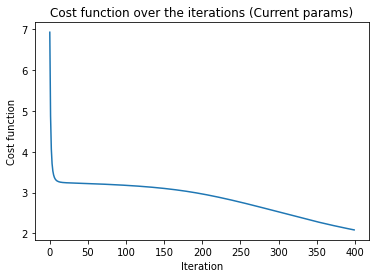

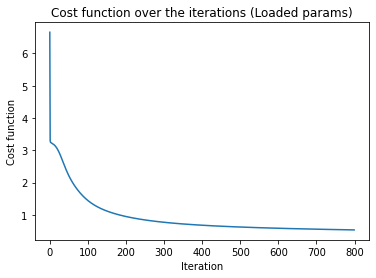

In [15]:
plt.plot(nnC_history)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Cost function over the iterations (Current params)')
plt.show()

nnC_history_load=np.loadtxt("nnC_history_800.txt")
plt.plot(nnC_history_load)
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.title('Cost function over the iterations (Loaded params)')
plt.show()